# SI 618 - Homework #1: Data Manipulation

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
MY_UNIQNAME = 'huangmy'

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel!**

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

* Read the data first

In [2]:
import pandas as pd
import html5lib
from pandas import Series
import numpy as np

In [3]:
# Use pd.read_csv to import csv files
athlete_events = pd.read_csv("data/homework1/athlete_events.csv")
noc = pd.read_csv("data/homework1/noc_regions.csv")

* Here I still use pd.read_csv to import the second source. I found that there are some merged cells on the website forms and it may be a little hard to deal with if I use read_html directly. Thus I re-opened them as csv files and cancelled the merging cells. Then I can use read_csv to operate, which should be able to avoid further mistakes caused by merged cells.

In [4]:
# if I use read_html, it should be like:
# url = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
# data = pd.read_html(url)
# and use data = data[i] to get the i-th form on the website

In [5]:
# read unsucessful cities 
unsuccess_cities = pd.read_csv("data/homework1/Unsuccessful cities.csv")
# delete strange '?' caused by reading files
unsuccess_cities['Country'] = unsuccess_cities['Country'].map(lambda x: x.lstrip('?'))

# Read Olympic games host cities
host_cities = pd.read_csv("data/homework1/Olympic Games host cities.csv")
host_cities['Country'] = host_cities['Country'].map(lambda x: x.lstrip('?'))

# Read List of countries ranked by times
rank_country = pd.read_csv("data/homework1/List of countries ranked by times.csv")
rank_country['Country'] = rank_country['Country'].map(lambda x: x.lstrip('?'))

# Read Number of Olympic Games by continent
continent = pd.read_csv("data/homework1/Number of Olympic Games by continent.csv")

# Read List of cities hosted multiple
multiple_cities = pd.read_csv("data/homework1/List of cities hosted multiple.csv")
multiple_cities['Country'] = multiple_cities['Country'].map(lambda x: x.lstrip('?'))

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [6]:
# Use some describe command
print("For the first data source--Two frames:")
print("The shape of 'athlete_events' is: ", athlete_events.shape)
print("The shape of 'noc_regions' is: ", noc.shape)

print("For the second data source--Five frames:")
print("The shape of 'Olympic Games Host Cities' is: ", host_cities.shape)
print("The shape of 'List of countries ranked by host times' is: ", rank_country.shape)
print("The shape of 'List of countries hosted multiple times' is: ", multiple_cities.shape)
print("The shape of 'Number of Olympic Games by continent' is: ", continent.shape)
print("The shape of 'Unsuccessful cities' is: ", unsuccess_cities.shape)

For the first data source--Two frames:
The shape of 'athlete_events' is:  (271116, 15)
The shape of 'noc_regions' is:  (230, 3)
For the second data source--Five frames:
The shape of 'Olympic Games Host Cities' is:  (71, 10)
The shape of 'List of countries ranked by host times' is:  (27, 8)
The shape of 'List of countries hosted multiple times' is:  (10, 8)
The shape of 'Number of Olympic Games by continent' is:  (6, 7)
The shape of 'Unsuccessful cities' is:  (18, 3)


In [7]:
# Give some interesting descriptive details and explain
# Based on athlete individuals
print(athlete_events[['Height','Weight']].describe())
print(athlete_events[['Season','Event', 'City']].describe())
print(athlete_events[(athlete_events.Sex == 'M')&(athlete_events.Year>=2000)]['Medal'].value_counts())
print(athlete_events[(athlete_events.Sex == 'F')&(athlete_events.Year>=2000)]['Medal'].value_counts())
# Based on cities, coutries and continent data
# number of cities
host_cities_hold = host_cities[~host_cities['Opening Ceremony'].str.startswith('Cancelled')]
print(host_cities_hold[(host_cities_hold['Year']<=2020)].Year.value_counts().plot.hist())
print(host_cities_hold.Continent.value_counts())
# find frequency of London
print(len(host_cities_hold[host_cities_hold['City'].str.startswith('London')]))

              Height         Weight
count  210945.000000  208241.000000
mean      175.338970      70.702393
std        10.518462      14.348020
min       127.000000      25.000000
25%       168.000000      60.000000
50%       175.000000      70.000000
75%       183.000000      79.000000
max       226.000000     214.000000
        Season                    Event    City
count   271116                   271116  271116
unique       2                      765      42
top     Summer  Football Men's Football  London
freq    222552                     5733   22426
Bronze    2279
Gold      2183
Silver    2146
Name: Medal, dtype: int64
Bronze    1873
Silver    1831
Gold      1826
Name: Medal, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)
Europe            33
North America     13
Asia               9
South America      2
Europe[h]          2
Oceania            2
Africa             1
Southeast Asia     1
Name: Continent, dtype: int64
3


### Some interesting details
#### Athletes information
* According to the descriptive statistics of 'Height' and 'Weight', the respective mean values are 175.33 and 70.70. And corresponding std values are 10.51 and 14.34. This indicates that the volatility/variation of weight within these athletes is more obvious.
* According to the descriptive statistics of 'Season', 'Event' and 'City', we find that there are more athletes in summer season. What's more, the most common event and city are Men's Football and London respectively.
* According to the comparison of male and female athletes' performance after year 2000, we may also find some facts: 1) male athletes' total number of medals is higher. 2) Among male athletes' medals, Bronze medal has the higher percentage. 3) the percent of three kinds of medals is approximately the same in female athletes records.  

#### Cities, Countries and Continents information
* According to continents frequency output,it is obvious that the top three continents are Europe, North America and Asia. Among all the host cities, London should be one of the cities with high frequency. In fact, London has hosted Olympic Games for three times.
* In most of years, the number of host cities would be larger than 1 thus we get the frequency of host cities each year. Here we only consider the records before year 2020. 

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [8]:
# base on the athletes events records
male_athlete = athlete_events[athlete_events['Sex']=='M']
female_athlete = athlete_events[athlete_events['Sex']=='F']
print('number of male athletes:', len(male_athlete))
print('number of femalle athletes:', len(female_athlete))
print('ratio of female to male athletes:', len(female_athlete)/len(male_athlete))

number of male athletes: 196594
number of femalle athletes: 74522
ratio of female to male athletes: 0.37906548521318045


Comment: Here we want to find the total number of male & female athletes'appearance from 1896-2016 and their ratio based on these two total numbers. The ratio is 38%, which indicates that the number of female athletes'appearance is 62% less than the one of male athletes'appearance. Here we do not delete some duplicated names.

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [9]:
print(athlete_events['Name'].value_counts().head(1))

# find his events
Robert_record = athlete_events[athlete_events['Name'] == "Robert Tait McKenzie"]
print(Robert_record['Event'].unique())

# find years
range_ath = Robert_record['Year'].max() - Robert_record['Year'].min()
print('His starting year:', Robert_record['Year'].min())
print('The year range is:', range_ath)
print('The country he represents:', Robert_record['Team'].iloc[0])

Robert Tait McKenzie    58
Name: Name, dtype: int64
['Art Competitions Mixed Sculpturing'
 'Art Competitions Mixed Sculpturing, Statues'
 'Art Competitions Mixed Sculpturing, Medals And Reliefs'
 'Art Competitions Mixed Sculpturing, Unknown Event'
 'Art Competitions Mixed Sculpturing, Medals']
His starting year: 1912
The year range is: 36
The country he represents: Canada


Comment: The athlete named Robert Tait Mckenzie competed in most number of events and he participated in 58 events in total. He started in year 1912 and continued for 36 years. He represents the team Canada and his event is Art Competitions Mixed Sculpturing. Also, some subclasses of this event have been printed above. 

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

    Sport   Age
42  Roque  59.0


Text(0,0.5,'Median Age')

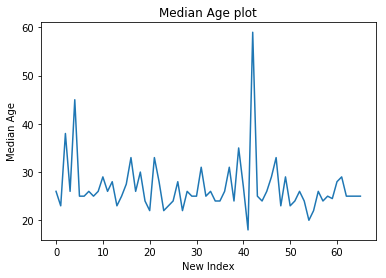

In [10]:
sport_age = athlete_events.groupby('Sport').Age.median()
# reset_index operation can turn Series into dataframe
sport_age = sport_age.reset_index()

# get the maximum age and its event directly
print(sport_age[sport_age['Age'] == sport_age['Age'].max()])
# we may also draw a plot based on the new index
ax = sport_age['Age'].plot(title='Median Age plot')
ax.set_xlabel('New Index')
ax.set_ylabel('Median Age')0

Comment: According to the output, the sport 'Roque' has the highest median age, which is 59. After the groupby result, we can get the answer directly. Else we set the result to be a new dataframe and set new index. Here I made a new plot based on the new index, which also shows that the highest median age appears in the line with index '42'. 

### 10 pt: In which events has Jamaica won the most medals?

In [11]:
# filter medal records of Jamaica
medal_J = athlete_events[(athlete_events['NOC'] == 'JAM') & (~athlete_events['Medal'].isnull())]
Event_medal = medal_J.groupby('Event').size().reset_index(name='frequency')
print(Event_medal)
print('The most medals record:')
print(Event_medal[Event_medal['frequency'] == Event_medal['frequency'].max()])

                                     Event  frequency
0               Athletics Men's 100 metres          8
1       Athletics Men's 110 metres Hurdles          2
2               Athletics Men's 200 metres          7
3     Athletics Men's 4 x 100 metres Relay         16
4     Athletics Men's 4 x 400 metres Relay         27
5               Athletics Men's 400 metres          5
6       Athletics Men's 400 metres Hurdles          2
7               Athletics Men's 800 metres          2
8                Athletics Men's Long Jump          1
9             Athletics Women's 100 metres         13
10            Athletics Women's 200 metres         12
11  Athletics Women's 4 x 100 metres Relay         28
12  Athletics Women's 4 x 400 metres Relay         27
13            Athletics Women's 400 metres          3
14    Athletics Women's 400 metres Hurdles          3
15   Cycling Men's 1,000 metres Time Trial          1
The most medals record:
                                     Event  frequency
11  

Comment: According to the output, Jamaica has won the most medals in Athletics Women's 4 x 100 metres Relay.

### 10 pt: Which countries have more female medalists than male medalists?

In [12]:
# filter all medalists first
medal_athlete = athlete_events[~athlete_events['Medal'].isnull()]
# groupby two columns--NOC and Sex
medal_coun = medal_athlete.groupby(['NOC', 'Sex']).size().reset_index(name='number')

# get NOC female list
female_noc = medal_coun[medal_coun.Sex == 'F'].NOC.unique()

# compare and give output
result = []
for name in female_noc:
    # only female athletes
    if medal_coun[medal_coun.NOC == name].shape[0] == 1:
        result.append(name)
    # compare male and female athletes numbers
    elif int(medal_coun[(medal_coun.NOC == name) & (medal_coun.Sex == 'F')].number) > int(medal_coun[(medal_coun.NOC == name) & (medal_coun.Sex == 'M')].number):
        result.append(name)
print(result)

# find NOC countries in noc frame
country_list = noc[noc['NOC'].isin(result)].region.tolist()
country_list.append('Singapore')
print(country_list)

['BLR', 'BRN', 'CHN', 'CRC', 'JAM', 'KOS', 'LIE', 'MNE', 'MOZ', 'PER', 'PRK', 'ROU', 'SGP', 'UKR', 'ZIM']
['Belarus', 'Bahrain', 'China', 'Costa Rica', 'Jamaica', 'Kosovo', 'Liechtenstein', 'Montenegro', 'Mozambique', 'Peru', 'North Korea', 'Romania', 'Ukraine', 'Zimbabwe', 'Singapore']


Comment: First we filter all the medalists and groupby NOC and Sex to get the new dataframe. Then for those countries who only have female athletes, they are added directly to the final result. For the other countries, we compare and decide to add or not. Finally, we can tell the countries according to the NOC table. Since the NOC of 'Singapore' is different in these two tables, we add 'Singapore' manually.

### 10 pt: Which country won the most medal points in each of the 2014 Winter Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [13]:
# filter 2014, winter and medal first
filtered = athlete_events[(athlete_events.Year == 2014) & (athlete_events.Season == 'Winter') & (~athlete_events['Medal'].isnull())]
# groupby NOC and Medal
filtered = filtered.groupby(['NOC', 'Medal']).size().reset_index(name='number')

# calculate the score
# add the weight
filtered['weight'] = filtered.Medal.apply(lambda x: 1 if x=='Bronze' else 2 if x=='Silver' else 3)
# add the score
filtered['score'] = filtered['number'] * filtered['weight']

# groupby NOC and get the sum of score
score_sum = filtered.groupby('NOC').sum()

print(score_sum.head())
print('Filter the country with the highest score:')
print(score_sum[score_sum['score'] == score_sum['score'].max()])

     number  weight  score
NOC                       
AUS       3       3      5
AUT      27       6     47
BLR       6       4     16
CAN      86       6    226
CHN      12       6     22
Filter the country with the highest score:
     number  weight  score
NOC                       
CAN      86       6    226


Comment: we first filter the data according to the year, season and medal. Then we add a new column called 'weight' according to the type of medal and calculate corresponding scores. The result shows that Canada has the highest medal points and the total score is 226.

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [48]:
# filter the year according to the athlete events time
host_countries = host_cities_hold[['Country', 'Year', 'Opening Ceremony']]
host_countries.columns = ['Country', 'Year','Time']
host_countries = host_countries[host_countries['Year']<=2016]
# add label for type
host_countries['Type'] = host_countries.Time.apply(lambda x: 'Winter' if 'Jan' in x or 'Feb' in x else 'Summer')
host_countries.reset_index(drop=True, inplace=True)


# find the total number of gold medal for each game
# count the number given year and game type
def total_gold_count(year, game_type):
    count = len(athlete_events[(athlete_events.Medal == 'Gold') & 
                               (athlete_events.Year == year) & (athlete_events.Season == game_type)])
    return count
    
# there is missing data for some years thus we only concentrate on those available records
# dict--turn the country into corresponding NOC name based on noc_regions set
noc_temp = noc[noc['notes'].isnull()]
name_dict = Series(noc_temp.NOC.values,index=noc_temp.region).to_dict()
# add some additional values for alias
name_dict['United States'] = 'USA'
name_dict['United Kingdom'] = 'GBR'
name_dict['Soviet Union'] = 'URS'
name_dict['Yugoslavia'] = 'YUG'
name_dict['Nazi Germany'] = 'GER'
name_dict['West Germany'] = 'FRG'


def indi_gold_count(country, year, game_type):
    # count the country's gold medals
    count = len(athlete_events[(athlete_events.Medal == 'Gold') & 
                               (athlete_events.Year == year) & (athlete_events.Season == game_type) & 
                               (athlete_events.NOC == name_dict[country])])
    return count

# set new columns to record the total number of gold medals in that game, host countries' medals and proportion
host_countries['Total'] = 0
host_countries['Medal'] = 0
host_countries['Proportion'] = 0
for i in range(len(host_countries)):
    host_countries.loc[i, 'Total'] = total_gold_count(host_countries.loc[i].Year, host_countries.loc[i].Type)
    if host_countries.loc[i, 'Total'] != 0:
        if host_countries.loc[i].Country in name_dict:
            host_countries.loc[i, 'Medal'] = indi_gold_count(host_countries.loc[i].Country, 
                                                             host_countries.loc[i].Year, 
                                                             host_countries.loc[i].Type)
        else:
            host_countries.loc[i, 'Medal'] = np.nan
        host_countries.loc[i, 'Proportion'] = host_countries.loc[i, 'Medal']/host_countries.loc[i, 'Total']
        # turn to percent format
        host_countries.loc[i, 'Proportion'] = '%.2f%%' % (host_countries.loc[i, 'Proportion'] * 100)
    else: # total number absent
        host_countries.loc[i, 'Proportion'] = np.nan
        
print(host_countries)



           Country  Year      Time    Type  Total  Medal Proportion
0           Greece  1896   6-April  Summer     62     10     16.13%
1           France  1900    14-May  Summer    201     52     25.87%
2    United States  1904     1-Jul  Summer    173    128     73.99%
3   United Kingdom  1908  27-April  Summer    294    147     50.00%
4           Sweden  1912     5-May  Summer    326    103     31.60%
5          Belgium  1920  20-April  Summer    493     57     11.56%
6           France  1924    25-Jan  Winter     55      0      0.00%
7           France  1924     4-May  Summer    277     37     13.36%
8      Switzerland  1928    11-Feb  Winter     30      0      0.00%
9      Netherlands  1928    17-May  Summer    245     20      8.16%
10   United States  1932     4-Feb  Winter     32     10     31.25%
11   United States  1932    30-Jul  Summer    229     81     35.37%
12    Nazi Germany  1936     6-Feb  Winter     36      4     11.11%
13    Nazi Germany  1936     1-Aug  Summer    31

Comment: 
* All the proportion values have been given in the last column of output above.
* Here we first set up a new dataframe based on the Host year, Host country and its opening ceremony. And we add a new column to label Summer and Winter. Then we set up the dictionary for the country name and its NOC, which would be used to combine two sets' information. 
* And then we define two functions which are used to count the total number of gold medals in each game and the number of gold medals that host countries won. 
* Based on these information, we can calculate the corresponding proportion values. 
* What's more, there is some missing information in 2010, 2012, 2014 and 2016 thus we simply leave the proportion as NAN values. 

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas